# 2) Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Admin\AppData\Local\Temp\ipykernel_8108\580572721.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

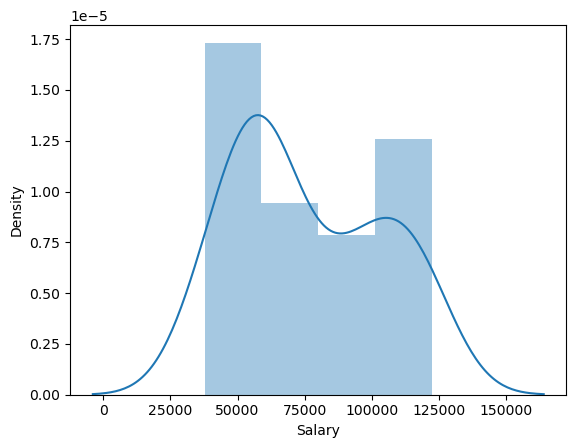

In [4]:
sns.distplot(data['Salary'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8108\1217533133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

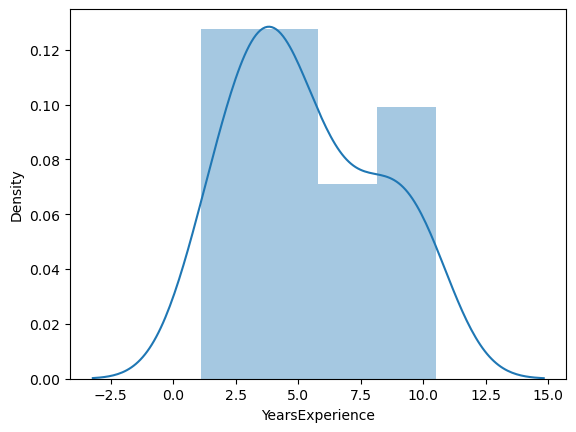

In [5]:
sns.distplot(data['YearsExperience'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8108\2310940967.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Salary')

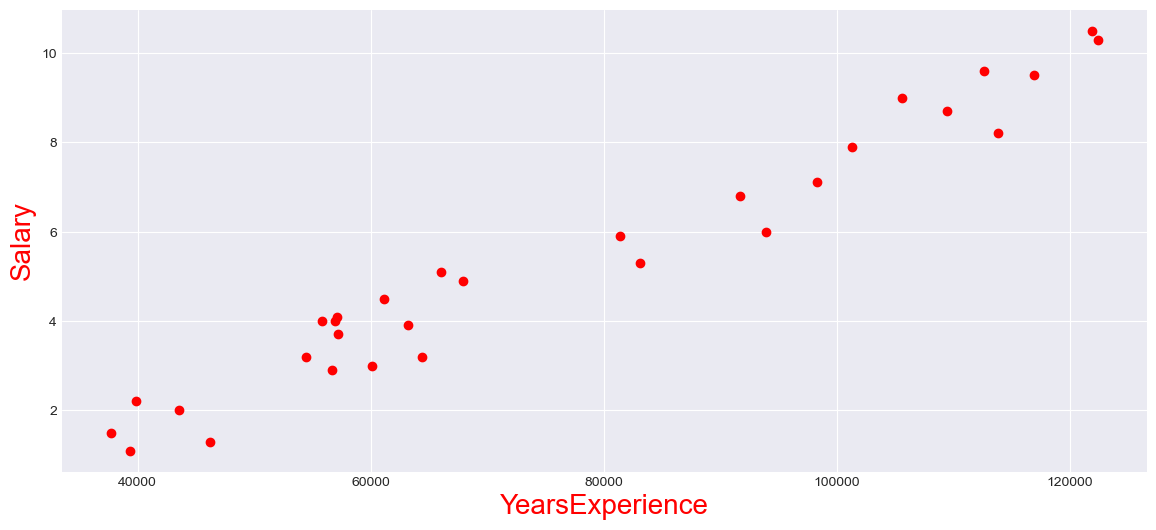

In [6]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["Salary"],data["YearsExperience"],color="red")
plt.xlabel("YearsExperience",size=20,color="red")
plt.ylabel("Salary",size=20,color="red")

# Correlation Analysis

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

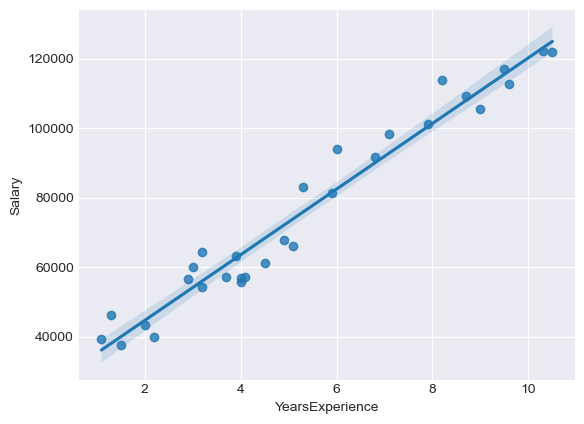

In [9]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

# Model Building & Testing

In [11]:
import statsmodels.formula.api as smf

In [19]:
model1=smf.ols("Salary~YearsExperience",data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        01:02:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Admin\AppData\Local\Temp\ipykernel_8108\233799533.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Salary')

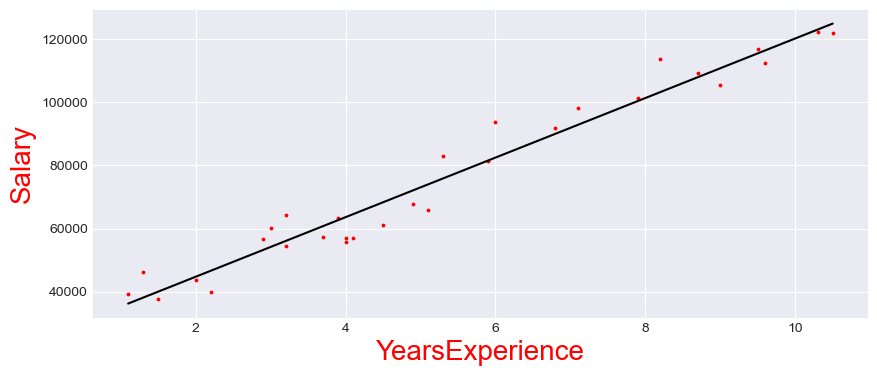

In [20]:
plt.figure(figsize=(10,4))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["YearsExperience"],data["Salary"],color="red",s=3)
plt.plot(data["YearsExperience"],model.predict(),color="black")
plt.xlabel("YearsExperience",size=20,color="red")
plt.ylabel("Salary",size=20,color="red")

# Apply log transformation to improve accuracy

In [14]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           3.25e-13
Time:                        01:00:01   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model3=smf.ols("np.log(Salary)~(YearsExperience)",data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           7.03e-18
Time:                        01:00:44   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Apply square-root transformation to improve accuracy

In [16]:
model4=smf.ols("np.log(Salary)~YearsExperience+pow(YearsExperience,2)",data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           3.95e-18
Time:                        01:01:11   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience             0.2024      0.027      7.601      0.000       0.148       0.257
pow(YearsExperience, 2)    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  Apply cube-root transformation to improve accuracy

In [17]:
model5=smf.ols("np.log(Salary)~YearsExperience+pow(YearsExperience,3)",data=data).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     258.2
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           2.50e-18
Time:                        01:01:37   Log-Likelihood:                 32.898
No. Observations:                  30   AIC:                            -59.80
Df Residuals:                      27   BIC:                            -55.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3720      0.054    190.702      0.000      10.260      10.484
YearsExperience             0.1724      0.016     10.852      0.000       0.140       0.205
pow(YearsExperience, 3)    -0.0004      0.000     -3.158      0.004      -0.001      -0.000
==============================================================================
Omnibus:                        0.991   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.975
Skew:                           0.292   Prob(JB):                        0.614
Kurtosis:                       2.338   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from scipy.stats import kurtosis,skew
skew(data),kurtosis(data)

(array([0.36031233, 0.33616188]), array([-1.0447522, -1.2829125]))

# Model Predictions

In [36]:
# Among all the model testing "model1" giving the best accuracy

C:\Users\Admin\AppData\Local\Temp\ipykernel_8108\596211765.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Salary')

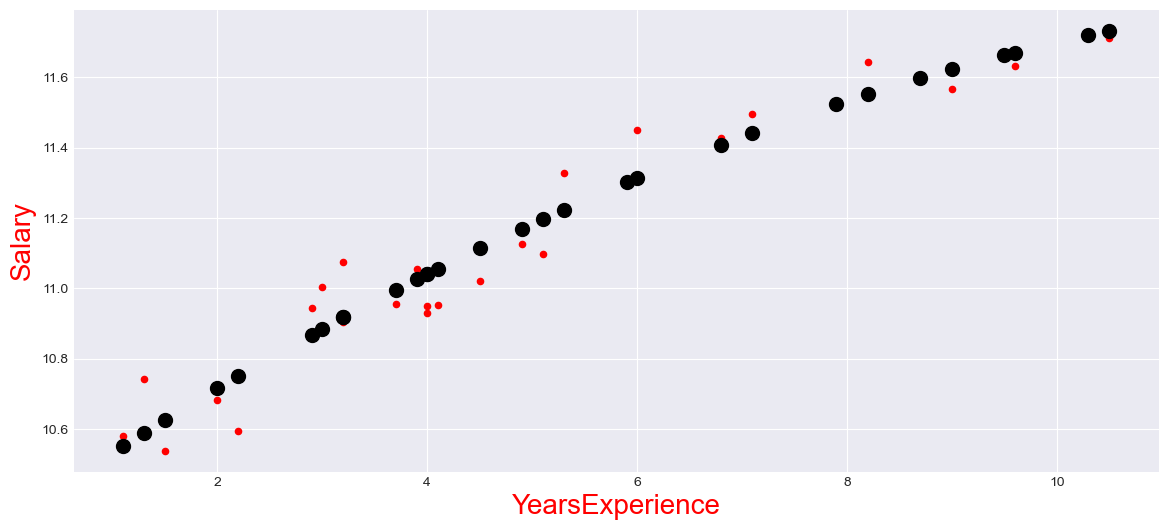

In [23]:
model1=smf.ols("Salary~YearsExperience",data=data).fit()
model1.summary()



plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")

plt.scatter(data["YearsExperience"],np.log(data["Salary"]),color="red",s=20)
plt.scatter(data["YearsExperience"],model4.fittedvalues,color="black",s=100)


plt.xlabel("YearsExperience",size=20,color="red")
plt.ylabel("Salary",size=20,color="red")

In [24]:
newdata=pd.Series([9,10])
newdata

0     9
1    10
dtype: int64

In [25]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])
data_pred

,YearsExperience
0,9
1,10


In [26]:
model1.predict(data_pred)

0    110841.861092
1    120291.823413
dtype: float64